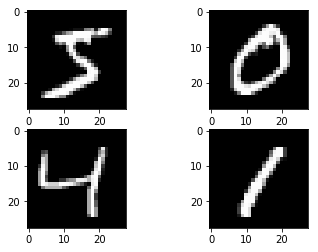

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
10s - loss: 0.2793 - acc: 0.9209 - val_loss: 0.1418 - val_acc: 0.9573
Epoch 2/10
9s - loss: 0.1119 - acc: 0.9676 - val_loss: 0.0916 - val_acc: 0.9707
Epoch 3/10
9s - loss: 0.0719 - acc: 0.9797 - val_loss: 0.0785 - val_acc: 0.9771
Epoch 4/10
10s - loss: 0.0503 - acc: 0.9858 - val_loss: 0.0743 - val_acc: 0.9775
Epoch 5/10
9s - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0680 - val_acc: 0.9790
Epoch 6/10
10s - loss: 0.0267 - acc: 0.9929 - val_loss: 0.0631 - val_acc: 0.9799
Epoch 7/10
10s - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0631 - val_acc: 0.9805
Epoch 8/10
10s - loss: 0.0142 - acc: 0.9968 - val_loss: 0.0648 - val_acc: 0.9792
Epoch 9/10
10s - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0581 - val_acc: 0.9812
Epoch 10/10
9s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0590 - val_acc: 0.9818
Baseline Error: 1.82%


In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

